In [1]:
## Make figures on assembly processes 

In [2]:
# imports 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# import the results table 
qpen_results = pd.read_csv('../data/assembly_processes/qpen_results.csv', index_col=0)

# import the metadata table 
metadata = pd.read_csv('../metadata/long_term_migration_metadata.csv')
tube_dict = dict(zip(metadata['FAME'], metadata['tube']))
location_dict = dict(zip(metadata['FAME'], metadata['location']))
date_dict = dict(zip(metadata['FAME'], metadata['sewage_date']))

# mark the tube that it comes from 
qpen_results['sample1_tube'] = [tube_dict.get(f) for f in qpen_results['sample1']]
qpen_results['sample2_tube'] = [tube_dict.get(f) for f in qpen_results['sample2']] 
qpen_results['sample1_location'] = [location_dict.get(f) for f in qpen_results['sample1']]
qpen_results['sample2_location'] = [location_dict.get(f) for f in qpen_results['sample2']]
qpen_results['sewage_date'] = [date_dict.get(f) for f in qpen_results['sample1']]

In [4]:
qpen_before_after = qpen_results[qpen_results['sample1_tube'] == qpen_results['sample2_tube']]
qpen_same_location = qpen_results[qpen_results['sample1_location'] == qpen_results['sample2_location']]

In [5]:
len(qpen_before_after)

10

Comparison between the starts and the ends 

## repeat with the viruses qpen results 

In [7]:
qpen_results_viruses = pd.read_csv('../data/assembly_processes/qpen_viruses_phables_results.csv')

# import the metadata table 
metadata = pd.read_csv('../metadata/long_term_migration_metadata.csv')
tube_dict = dict(zip(metadata['FAME'], metadata['tube']))
location_dict = dict(zip(metadata['FAME'], metadata['location']))
date_dict = dict(zip(metadata['FAME'], metadata['sewage_date']))

# mark the tube that it comes from 
qpen_results_viruses['sample1_tube'] = [tube_dict.get(f) for f in qpen_results_viruses['sample1']]
qpen_results_viruses['sample2_tube'] = [tube_dict.get(f) for f in qpen_results_viruses['sample2']] 
qpen_results_viruses['sample1_location'] = [location_dict.get(f) for f in qpen_results_viruses['sample1']]
qpen_results_viruses['sample2_location'] = [location_dict.get(f) for f in qpen_results_viruses['sample2']]
qpen_results_viruses['sewage_date'] = [date_dict.get(f) for f in qpen_results_viruses['sample1']]

In [8]:
qpen_viruses_before_after = qpen_results_viruses[qpen_results_viruses['sample1_tube'] == qpen_results_viruses['sample2_tube']]
qpen_viruses_same_location = qpen_results_viruses[qpen_results_viruses['sample1_location'] == qpen_results_viruses['sample2_location']]

In [9]:
qpen_before_after['bNTI'].std()

1.1502012743978354

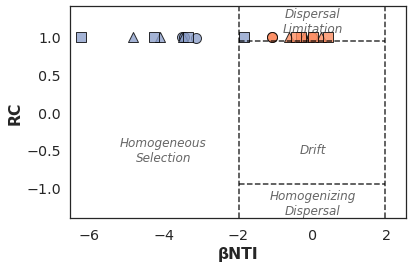

In [10]:
sns.set(font_scale=1.3, style='white')
plt.figure(figsize=(6, 4))

# Define the shapes (all grey)
date_shapes = {
    '13/4/2021': 'o',     # circle
    '15/6/2021': '^',     # triangle  
    '21/4/2021': 's'      # square
}

# Plot each date group separately with different markers
for date, marker in date_shapes.items():
    subset = qpen_viruses_before_after[qpen_viruses_before_after['sewage_date'] == date]
    plt.scatter(subset['bNTI'], subset['RC'], 
               marker=marker, s=100, color='#fc8d62', 
               edgecolor='black', linewidth=1, 
               label=date, alpha=0.8)
    
for date, marker in date_shapes.items():
    subset = qpen_before_after[qpen_before_after['sewage_date'] == date]
    plt.scatter(subset['bNTI'], subset['RC'], 
               marker=marker, s=100, color='#8da0cb', 
               edgecolor='black', linewidth=1, 
               label=date, alpha=0.8)

# Axis limits
plt.xlim((-6.5, 2.5))
plt.ylim((-1.4, 1.4))

# Thicker vertical reference lines
plt.axvline(x=-1.96, color='black', linestyle='--', alpha=0.8, linewidth=1.5)
plt.axvline(x=1.96, color='black', linestyle='--', alpha=0.8, linewidth=1.5)

# Calculate horizontal line fractions for new x range
xmin_val, xmax_val = plt.xlim()
xmin = (-1.96 - xmin_val) / (xmax_val - xmin_val)
xmax = (1.96 - xmin_val) / (xmax_val - xmin_val)

# Horizontal lines only between -1.96 and 1.96
plt.axhline(y=0.95, xmin=xmin, xmax=xmax,
            color='black', linestyle='--', alpha=0.8, linewidth=1.5)
plt.axhline(y=-0.95, xmin=xmin, xmax=xmax,
            color='black', linestyle='--', alpha=0.8, linewidth=1.5)

# Labels
plt.xlabel('βNTI', fontweight='bold')
plt.ylabel('RC', fontweight='bold')

# Process labels
plt.text(-4., -0.5, 'Homogeneous\nSelection', ha='center', va='center', 
         fontsize=12, style='italic', alpha=0.7)
plt.text(0, -0.5, 'Drift', ha='center', va='center', 
         fontsize=12, style='italic', alpha=0.7)
# Removed right-hand label since xmax is now 2.5
plt.text(0., -1.2, 'Homogenizing\nDispersal', ha='center', va='center', 
         fontsize=12, style='italic', alpha=0.7)
plt.text(0., 1.2, 'Dispersal\nLimitation', ha='center', va='center', 
         fontsize=12, style='italic', alpha=0.7)

plt.tight_layout()
plt.savefig('../figures/bnti_rc_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [25]:
qpen_before_after

,sample1,sample2,bMNTD,BC,bNTI,RC,process,sample1_tube,sample2_tube,sample1_location,sample2_location,sewage_date
1,FAME000002,FAME000001,0.036341,0.914000,-3.508642,0.991992,Homogeneous.Selection,A1,A1,end,start,13/4/2021
42,FAME000004,FAME000003,0.034825,0.892027,-3.123956,0.981982,Homogeneous.Selection,B1,B1,end,start,13/4/2021
79,FAME000006,FAME000005,0.027228,0.908133,-3.457688,1.000000,Homogeneous.Selection,E1,E1,end,start,13/4/2021
127,FAME000009,FAME000008,0.048074,0.957065,-4.261102,1.000000,Homogeneous.Selection,B2,B2,end,start,21/4/2021
154,FAME000011,FAME000010,0.064388,0.921008,-1.843348,1.000000,Dispersal.Limitation,C2,C2,end,start,21/4/2021
177,FAME000013,FAME000012,0.073317,0.978508,-6.204581,1.000000,Homogeneous.Selection,D2,D2,start,end,21/4/2021
196,FAME000015,FAME000014,0.032587,0.882787,-3.331835,0.997998,Homogeneous.Selection,E2,E2,end,start,21/4/2021
211,FAME000017,FAME000016,0.033630,0.904672,-3.489092,1.000000,Homogeneous.Selection,A3,A3,end,start,15/6/2021
222,FAME000019,FAME000018,0.042449,0.965187,-4.085644,1.000000,Homogeneous.Selection,B3,B3,end,start,15/6/2021
231,FAME000023,FAME000022,0.040230,0.933784,-4.814129,1.000000,Homogeneous.Selection,E3,E3,end,start,15/6/2021


In [22]:
qpen_viruses_before_after

,Unnamed: 0,sample1,sample2,bMNTD,BC,bNTI,RC,process,sample1_tube,sample2_tube,sample1_location,sample2_location,sewage_date
0,1,FAME000002,FAME000001,0.021363,0.704208,-0.011554,1.0,Dispersal.Limitation,A1,A1,end,start,13/4/2021
41,42,FAME000004,FAME000003,0.021859,0.510074,-1.085961,1.0,Dispersal.Limitation,B1,B1,end,start,13/4/2021
78,79,FAME000006,FAME000005,0.017692,0.705026,-1.088868,1.0,Dispersal.Limitation,E1,E1,end,start,13/4/2021
126,127,FAME000009,FAME000008,0.032775,0.814584,-0.316333,1.0,Dispersal.Limitation,B2,B2,end,start,21/4/2021
153,154,FAME000011,FAME000010,0.030129,0.573819,-0.441020,1.0,Dispersal.Limitation,C2,C2,end,start,21/4/2021
176,177,FAME000013,FAME000012,0.038093,0.896891,0.005589,1.0,Dispersal.Limitation,D2,D2,start,end,21/4/2021
195,196,FAME000015,FAME000014,0.017365,0.803687,0.408260,1.0,Dispersal.Limitation,E2,E2,end,start,21/4/2021
210,211,FAME000017,FAME000016,0.031769,0.530318,0.233453,1.0,Dispersal.Limitation,A3,A3,end,start,15/6/2021
221,222,FAME000019,FAME000018,0.033484,0.643363,-0.235197,1.0,Dispersal.Limitation,B3,B3,end,start,15/6/2021
230,231,FAME000023,FAME000022,0.031763,0.634870,-0.631175,1.0,Dispersal.Limitation,E3,E3,end,start,15/6/2021
